#**Ejercicio semana 5 - Proyecciones**

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

#K-Means con SkLearns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


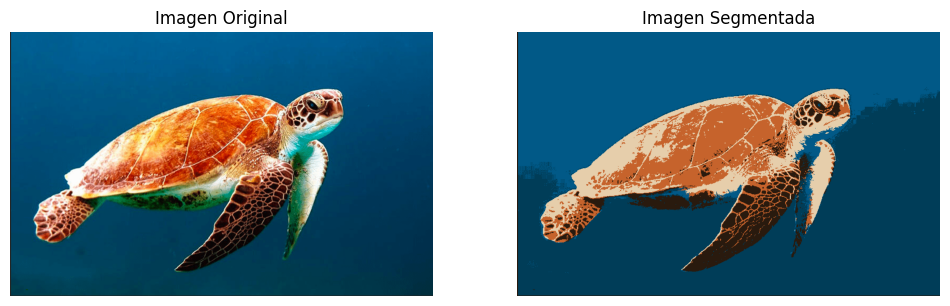

In [ ]:
import cv2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image_path = '/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /tortuga-marina-1.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir la imagen a RGB

# Obtener las dimensiones de la imagen y reformatearla para poder aplicar K-Means
h, w, _ = image.shape
image_reshaped = image.reshape(h * w, -1)

# Definir el número de clusters (segmentos) que queremos obtener
n_clusters = 5

# Aplicar K-Means para segmentar la imagen
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_reshaped)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(h, w, -1)

# Mostrar la imagen original y la imagen segmentada con Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img.astype(np.uint8))
plt.axis('off')
plt.title('Imagen Segmentada')

plt.show()


#OpenCV

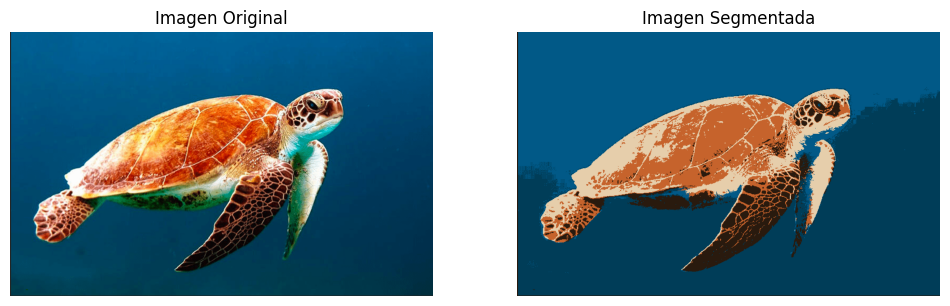

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image_path = '/content/drive/MyDrive/DECIMO SEMESTRE/VISION POR COMPUTADOR /tortuga-marina-1.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir la imagen a RGB

# Convertir la imagen a un array de puntos flotantes
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Definir los criterios para K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Definir el número de clusters (segmentos) que queremos obtener
k = 5

# Aplicar K-Means
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convertir los centros de los clusters a enteros
centers = np.uint8(centers)

# Asignar a cada pixel el valor del centro del cluster al que pertenece
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(image.shape)

# Mostrar la imagen original y la imagen segmentada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.axis('off')
plt.title('Imagen Segmentada')

plt.show()
